Import simulator and utilities

In [1]:
from Tfdtd.fdtd import FDTD2D
from Tfdtd.utilities import print_setup_info
from Tfdtd.detectors import PointDetector
from Tfdtd.sources import PointSource, LineSource

from Tfdtd.viz import viz2D

### Setting the simulation parameters from a dictionary

In [2]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 200,
    'ny': 200,
    'time_steps': 150,
    'dx': 0.01,
    'dy': 0.01,
    'polarization': 'TM',
    'use_pml': True,
    'pml_thickness': 20,
    'use_tfsf': False,
    'tfsf_thickness': 10,
}

In [4]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 200,
    'ny': 200,
    'time_steps': 1000,
    'dx': 0.01,
    'dy': 0.01,
    'polarization': 'TE',
    'use_pml': True,
    'pml_thickness': 20,
    'use_tfsf': False,
    'tfsf_thickness': 10,
    'function': 'sinusoidal',
    'frequency': 1500e6,
    'source_type': 'line_source',
    'line_x': 20,
    'line_y1': 40,
    'line_y2': 60,
}

### Testing initializations

In [3]:
sim = FDTD2D(params = params) # to read configuration from python dictionary
#sim = FDTD2D(config_file = 'config.yaml') # to read configuration from file

Reading configuration from dictionary...


### Set detectors

In [6]:
detector_params = {
    'name': 'detector1',
    'position': (50, 50),
}
point_detector = PointDetector(detector_params)
sim.add_detector(point_detector)

### Set sources

In [7]:
source_params ={
    'source_type': 'point_source',
    'function': 'sinusoidal',
    'frequency': 1500e6,
    'source_x': 30,
    'source_y': 30
}
point_source = PointSource(source_params)
sim.add_source(point_source)

### Set geometry

The geometry for this test is absent. Propagation in air.

### Print simulation info

In [8]:
print_setup_info(sim)

Simulation setup information:
nx: 200
ny: 200
time_steps: 150
dx: 0.01
dy: 0.01
dt: 2.358654336749684e-11
use_pml: True
pml_thickness: 20
c: 299792458
epsilon_0: 8.85418782e-12
mu_0: 1.25663706e-06
Source 0: source_type: point_source, function: sinusoidal, source_x: 30, source_y: 30, frequency: 1500000000.0, omega: 9424777960.769379
Detector 0: Detector: detector1, Position: (50, 50)


### Show material distribution

### Test simulation

In [9]:
for i in range(1, sim.time_steps):
        sim.simulation_step(i)
        sim.record_detectors(sim.h_field[:,:,2])
        sim.time += sim.dt

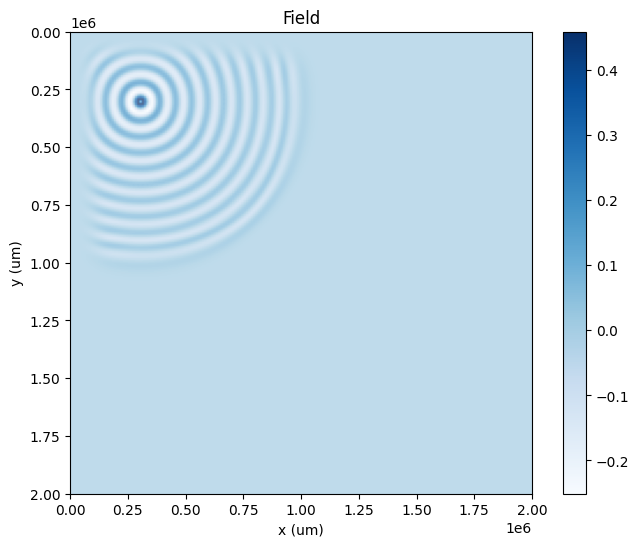

In [14]:
viz2D(sim, sim.e_field[:,:,2])

TypeError: Invalid shape (3, 2, 200) for image data

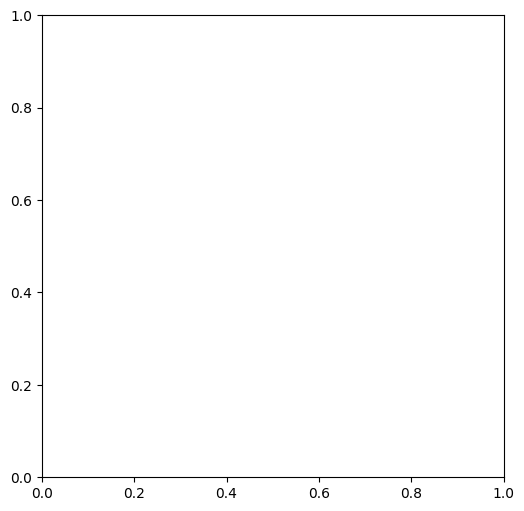

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# assume that you have already initialized your FDTD simulation and calculated the Ez field and the geometry mask
# you can modify the code below according to your simulation setup

# plot the Ez field with cmap jet
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.transpose(sim.e_field[:,:2]), cmap='jet', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0])
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Ez Field')
# plot the geometry mask with cmap binary
ax.imshow(np.transpose(sim.eps_r), cmap='binary', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0],alpha=0.3)

fig.colorbar(im)

plt.show()

c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


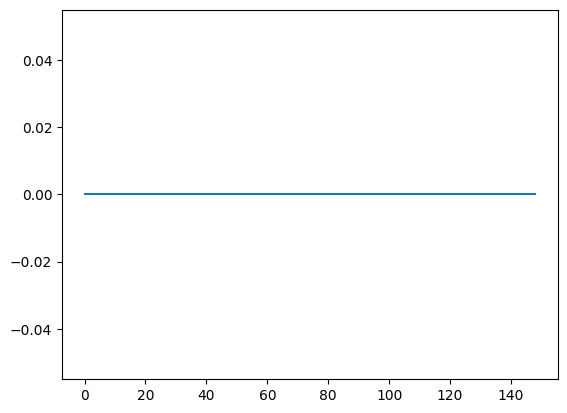

In [21]:
from matplotlib import pyplot as plt
plt.plot(point_detector.recorded_values)

In [10]:
!pip install vtk